In [2]:
pip install dcor

Defaulting to user installation because normal site-packages is not writeable
  Using cached dcor-0.6-py3-none-any.whl.metadata (6.2 kB)
Using cached dcor-0.6-py3-none-any.whl (55 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 1.1 MB/s eta 0:00:001.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 707.9 kB/s eta 0:00:00m eta 0:00:010:00:02
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dcor import distance_correlation
from scipy.stats import pearsonr

In [8]:
import seaborn as sns


In [2]:
# The method we have been working with so far. 
# prompts on the x axis and for each promot, we put two points:
# 1. Average Test Pass Rate (true label)
# 2. Average similarity (for a chosen method of code similairity)
# compute distance correlation
def visualize_corr_1(df, col1 ,col2):

    corrs = distance_correlation(df[col1], df[col2])
    print("The correlation between the average pass rate and", col2, "is", corrs)

    
    #plot the avg pass rate wih color red and sequence similarity with color blue
    plt.figure(figsize=(25,10))
    plt.scatter(df["task_id"],df[col2],color='blue')
    plt.scatter(df["task_id"],df[col1],color='red')
    plt.xlabel('Task ID')
    #rotate the x axis labels
    plt.xticks(ticks = [i for i in range(len(df))],labels = [i for i in range(len(df))], rotation=90)
    plt.ylabel('Scores')
    plt.legend([col2, col1])
    plt.title(f'{col2} vs {col1} ')
    plt.grid()
    plt.savefig(f'{col2}_vs_{col1}.png', dpi=750)
    plt.show()

In [33]:
df = pd.read_csv("RESULTS/test cases results/test_cases_results.csv")

In [4]:
df.head()

,task_id,prompt,GPT4_10_generated_tests,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_output,GPT4_10_generated_tests_outputs_similarity,GPT4_10_generated_tests_avg_outputs_similarity
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([], 1.0)#lak#has_close_elem...",\nfrom typing import List\n\ndef has_close_ele...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups(((()))')#lak#separate_pa...,\nfrom typing import List\n\ndef separate_pare...,\nfrom typing import List\n\ndef separate_pare...,\nfrom typing import List\n\n\ndef separate_pa...,\nfrom typing import List\n\n\ndef separate_pa...,\nfrom typing import List\n\n\ndef separate_pa...,\nfrom typing import List\n\n\ndef separate_pa...,55.0,"[['', '', '', '', '', ''], ['', '', '', '', ''...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, ...",98.0
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(0.75)#lak#truncate_number(10.0...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import trunc\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,100.0,"[['0.75', '0.75', '0.75', '0.75', '0.75', '0.7...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([100, -50, -30])#lak#below_zero([-1...",\nfrom typing import List\n\n\ndef below_zero(...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\n\ndef below_zero(...,\nfrom typing import List\n\n\ndef below_zero(...,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...",\nfrom typing import List\n\n\ndef mean_absolu...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,100.0,"[['1.2', '1.2', '1.2', '1.2', '1.2', '1.2'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0


The correlation between the average pass rate and GPT4_10_generated_tests_avg_outputs_similarity is 0.7848104718021046


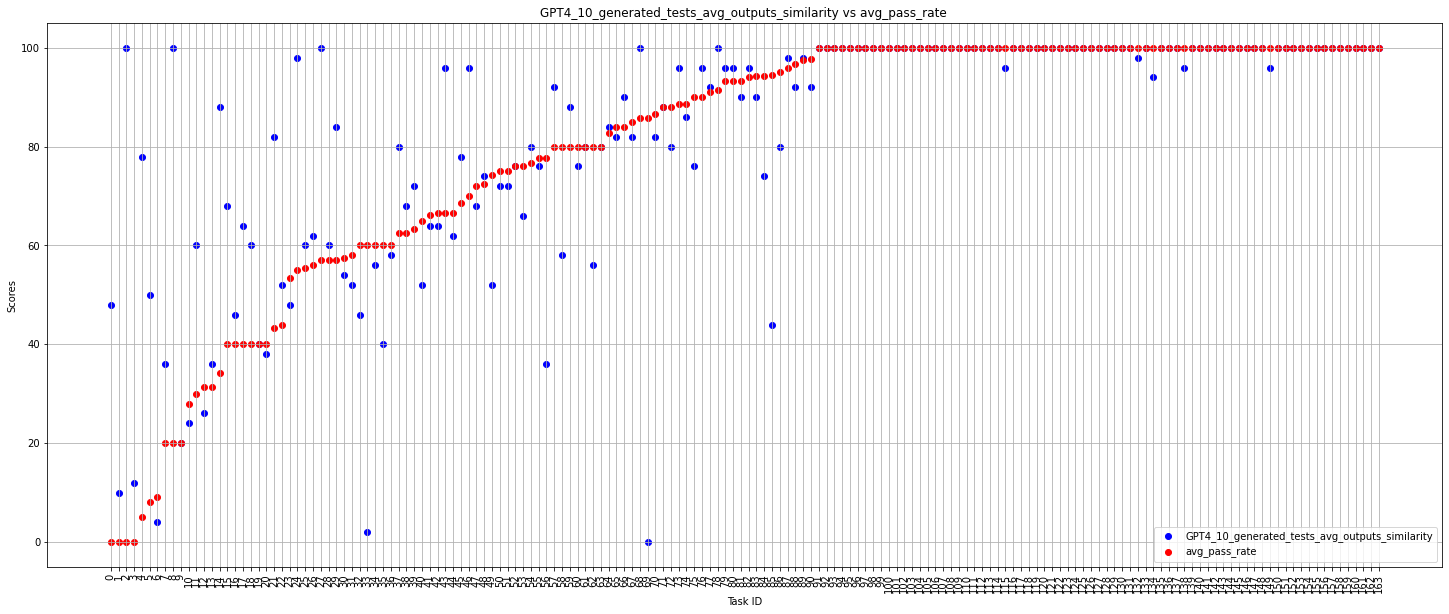

In [5]:
visualize_corr_1(df.sort_values(by = 'avg_pass_rate'), 'avg_pass_rate', 'GPT4_10_generated_tests_avg_outputs_similarity')

In [46]:
def visualize_corr_2(df, col1, col2, order = 2, figsize=(25,10)):
    """
    Plot correlation between two columns in a dataframe using both distance and Pearson correlation.
    If order is 1, the regresssion is assumed to be linear (try to fit a regression line)
    If order is 2, try to fit regression quadratic (polynomial of order 2)
    and so on
    
    """
    # Verify columns exist in dataframe
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"One or both columns not found in dataframe. Available columns: {df.columns.tolist()}")
    
    # Calculate correlations
    dcor_value = distance_correlation(df[col1], df[col2])
    pearson_value, _ = pearsonr(df[col1], df[col2])
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create scatter plot with regression line
    # Try polynomial fit if distance correlation is much higher than absolute Pearson
    sns.regplot(data=df, x=col1, y=col2,
                scatter_kws={'alpha': 0.5},
                order=order)
    # Add correlation information
    plt.text(0.05, 0.95, f'Distance Correlation: {dcor_value:.3f}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    plt.text(0.05, 0.90, f'Pearson Correlation: {pearson_value:.3f}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    
    # Customize the plot
    plt.title(f'Correlation between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Return correlation values
    return {'order': order, 'distance_correlation': dcor_value, 'pearson_correlation': pearson_value}

{'order': 1,
 'distance_correlation': 0.7848104718021046,
 'pearson_correlation': 0.7332318932311352}

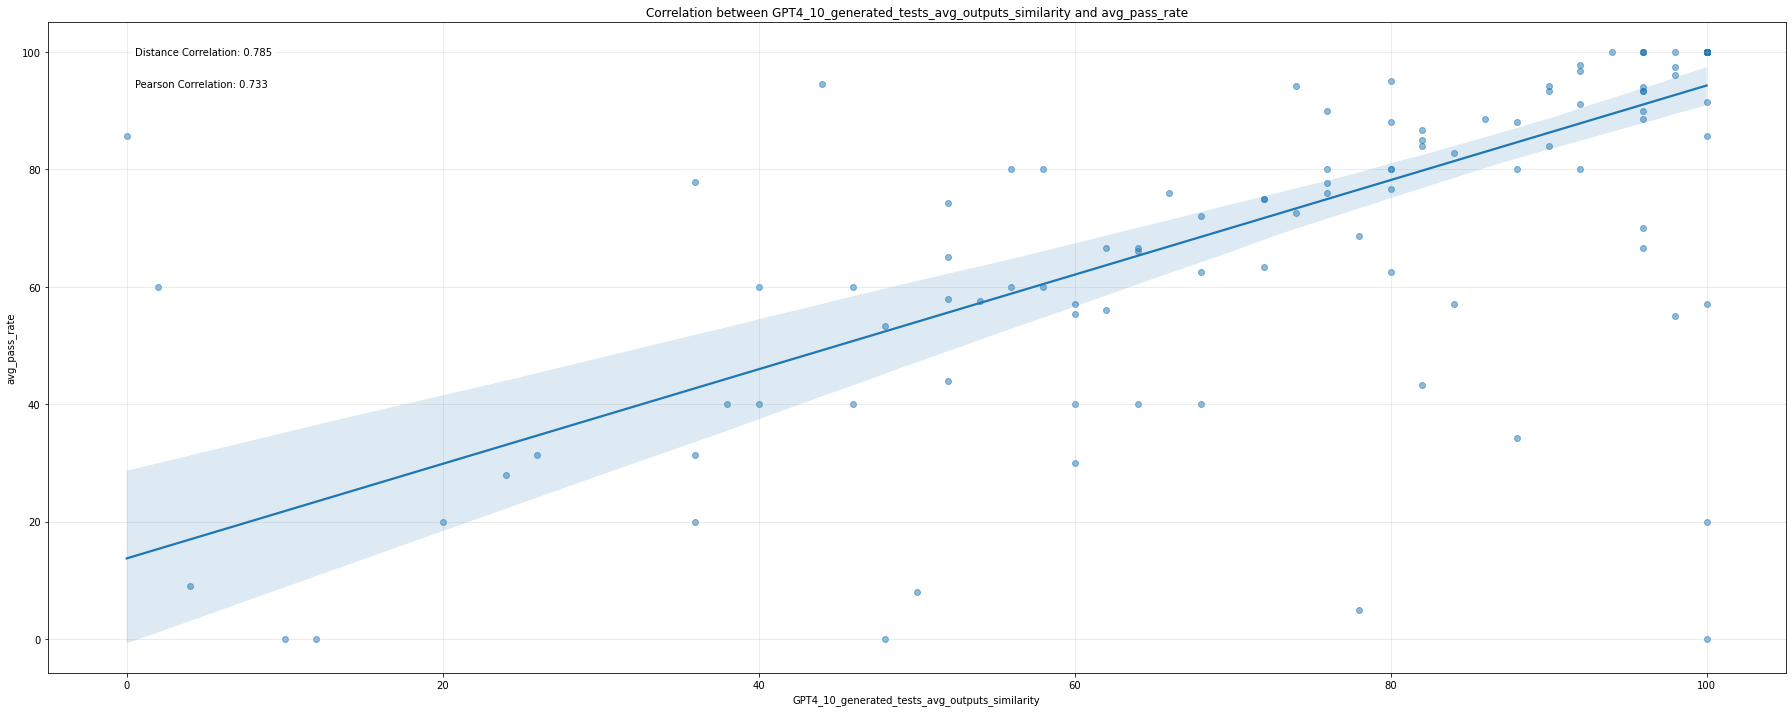

In [51]:
visualize_corr_2(df.sort_values(by = 'avg_pass_rate'), 'GPT4_10_generated_tests_avg_outputs_similarity', 'avg_pass_rate', 1)

{'order': 2,
 'distance_correlation': 0.7848104718021046,
 'pearson_correlation': 0.7332318932311352}

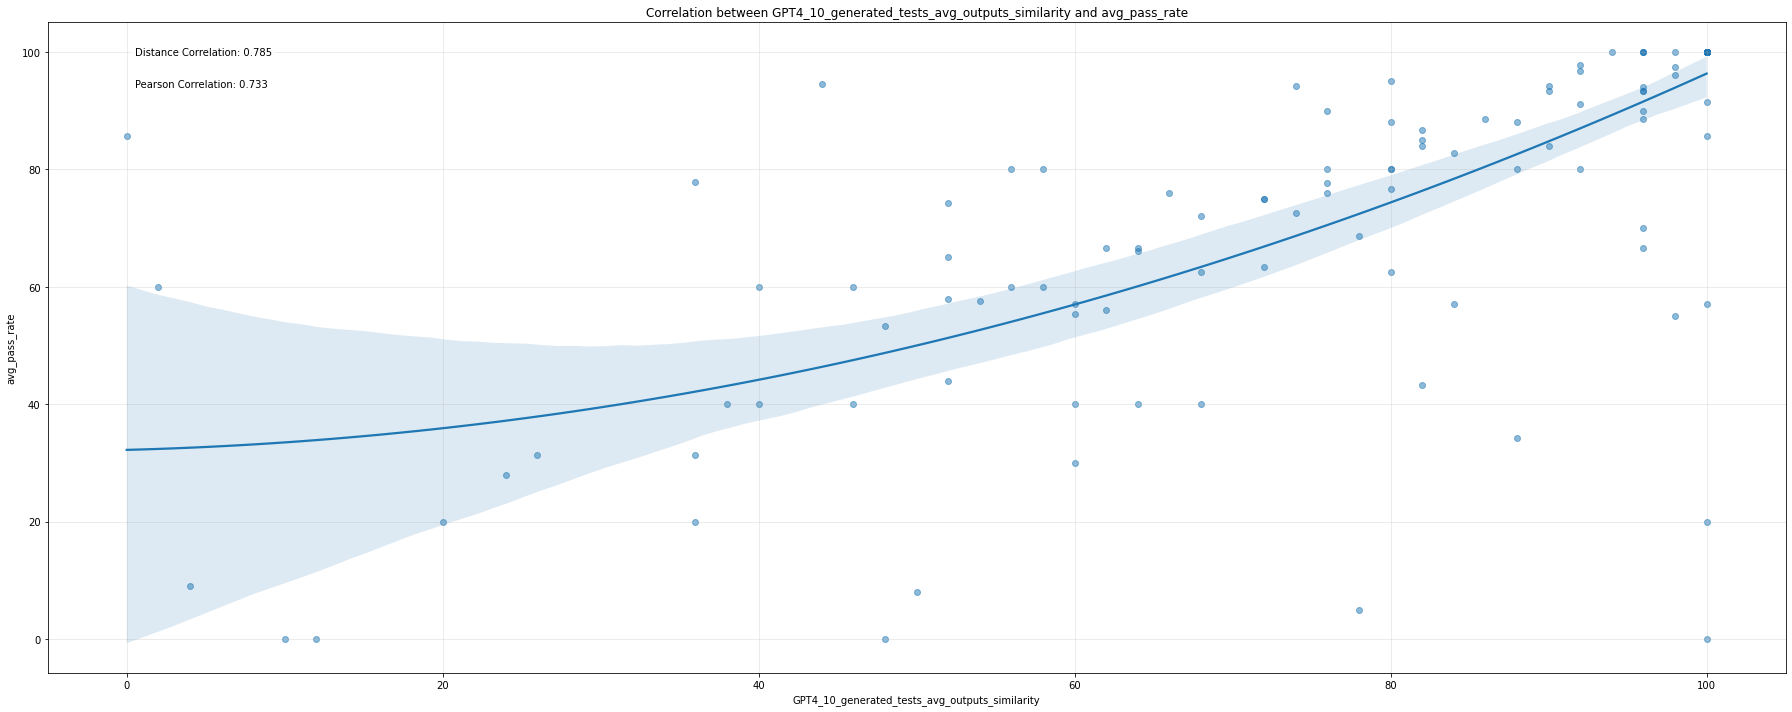

In [48]:
visualize_corr_2(df.sort_values(by = 'avg_pass_rate'), 'GPT4_10_generated_tests_avg_outputs_similarity', 'avg_pass_rate', 2)

{'order': 3,
 'distance_correlation': 0.7848104718021046,
 'pearson_correlation': 0.7332318932311352}

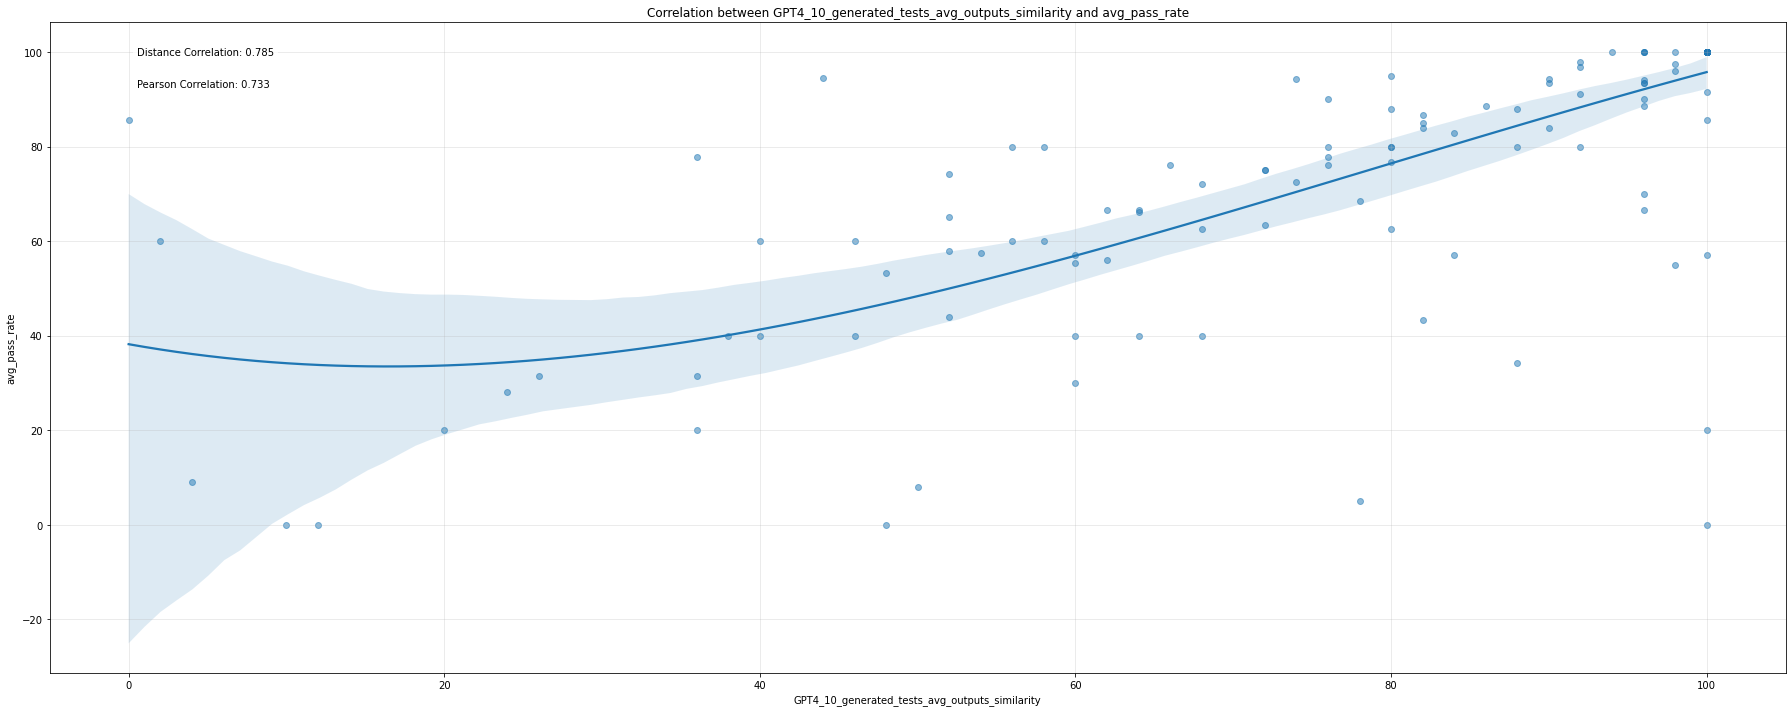

In [50]:
visualize_corr_2(df.sort_values(by = 'avg_pass_rate'), 'GPT4_10_generated_tests_avg_outputs_similarity', 'avg_pass_rate', 3)

{'order': 4,
 'distance_correlation': 0.7848104718021046,
 'pearson_correlation': 0.7332318932311352}

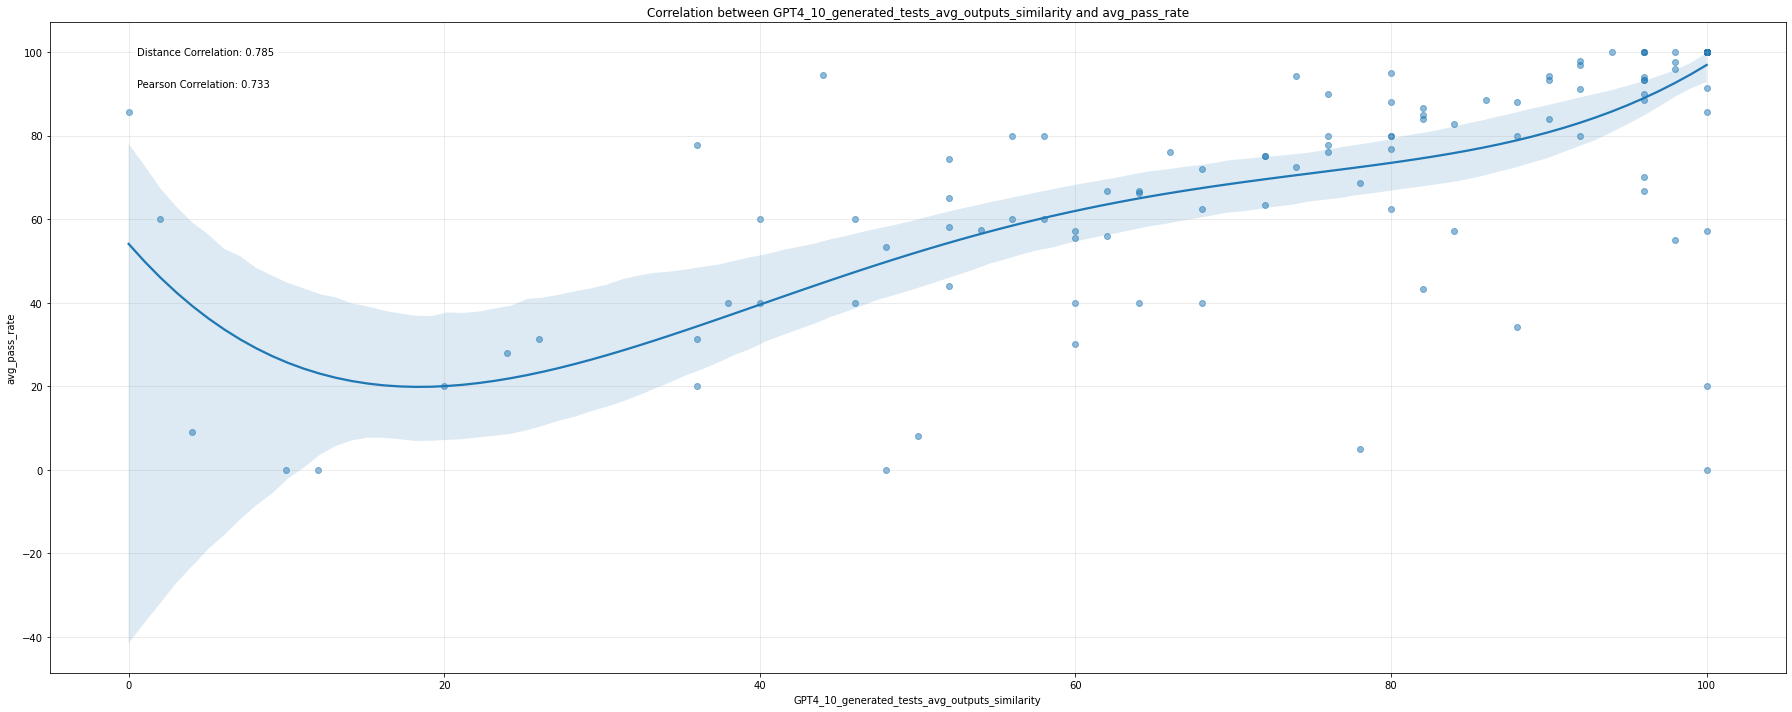

In [52]:
visualize_corr_2(df.sort_values(by = 'avg_pass_rate'), 'GPT4_10_generated_tests_avg_outputs_similarity', 'avg_pass_rate', 4)